In [16]:
import os
import glob
from functools import reduce

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Configurations

```json
{
    "vms": {
        "base_vm_id": 105,
        "clients": [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
        "type-unused": "NAT",
        "type": {
            "DR": {
                "prefix": "172.17.60.0/24",
                "iface": "eth1"
            }
        }
    },
    "httperf": {
        "vip": "172.17.60.201",
        "port": 80,
        "num-conns": 2000,
        "num-calls": 1,
        "rate": 20,
        "ramp": 20,
        "iters": 50,
        "timeout": 1
    }
}
```

In [18]:
run_name = "current/httperf_unbalance_wlc_to1_percentiles"

## Client side stats

In [19]:
# read in the data
plot_data_list = []

for i in glob.glob("./results/" + run_name + "/httperf_client_*.csv"):
    plot_data_list.append(pd.read_csv(i, header=0, na_filter=False))

In [20]:
plot_data = pd.DataFrame()

if len(plot_data_list) > 0:
    for i in list(plot_data_list[0]):
        if not i.startswith('Response time'):
            plot_data[i] = reduce(lambda x, y: x + y, [plot_data_list[j][i] for j in range(len(plot_data_list))])
        else:
            plot_data[i] = reduce(lambda x, y: x + y, [plot_data_list[j][i] 
                                                       for j in range(len(plot_data_list))]) / len(plot_data_list)

plot_data.head()

,Response time 66%,Response status 4xx,Response rate 99%,Response time 50%,Response time 99%,Response rate 66%,Response rate 75%,Response time,Number of requests,Response rate 90%,...,Response rate 98%,Response time 98%,Request rate,Response time 90%,Response status 5xx,Response status 2xx,Response time 80%,Response rate 50%,Rate,Response rate 95%
0,3.0000,0,320.0,1.5000,20.4375,304.0,304.0,3.60625,32000,308.0,...,319.0,16.6250,320.0,8.3750,0,32000,5.0625,304.0,320,317.0
1,22.5625,0,645.0,1.1875,465.2500,507.0,525.0,33.13125,30488,578.0,...,628.0,316.1875,605.6,65.1875,0,25230,52.5000,488.0,640,600.0
2,5.0625,0,1045.0,1.1875,454.3125,945.0,950.0,24.64375,32000,969.0,...,1045.0,269.7500,952.0,52.7500,0,31695,15.9375,939.0,960,989.0
3,3.6250,0,1321.0,2.0625,736.3125,1216.0,1236.0,32.94375,31819,1273.0,...,1321.0,458.4375,1260.2,54.3125,0,29940,5.8750,1180.0,1280,1283.0
4,4.7500,0,1662.0,3.0625,445.6875,1591.0,1601.0,24.75000,32000,1621.0,...,1662.0,301.7500,1586.2,48.0625,0,31855,15.3125,1573.0,1600,1644.0


### 1. Request rate

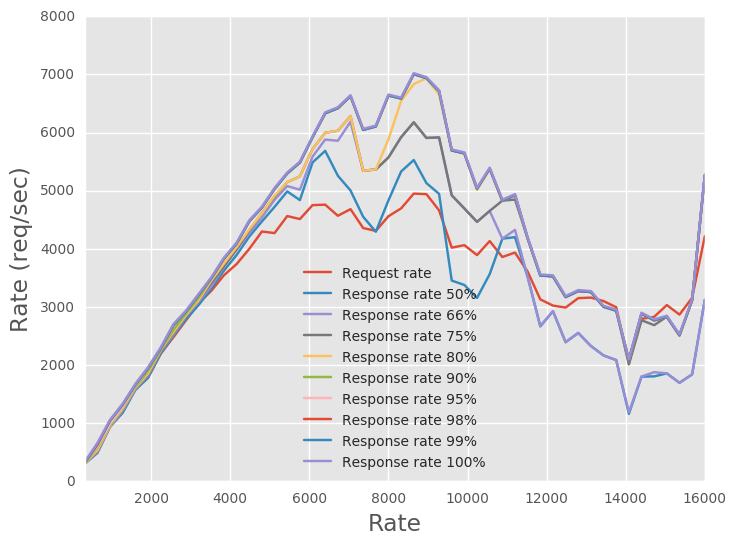

In [21]:
plot_data.plot('Rate', ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                        'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                        'Response rate 99%', 'Response rate 100%'], ylim=(0, None)).set_ylabel("Rate (req/sec)")

In [22]:
plot_data['Rate'].describe()

count       50.000000
mean      8160.000000
std       4664.761516
min        320.000000
25%       4240.000000
50%       8160.000000
75%      12080.000000
max      16000.000000
Name: Rate, dtype: float64

In [23]:
plot_data['Request rate'].describe()

count      50.000000
mean     3409.186000
std      1157.602364
min       320.000000
25%      2898.825000
50%      3576.700000
75%      4305.875000
max      4949.700000
Name: Request rate, dtype: float64

In [24]:
plot_data['Response rate 95%'].describe()

count      50.000000
mean     4110.000000
std      1802.155976
min       317.000000
25%      2894.250000
50%      3961.500000
75%      5603.500000
max      7006.000000
Name: Response rate 95%, dtype: float64

### 2. Response time

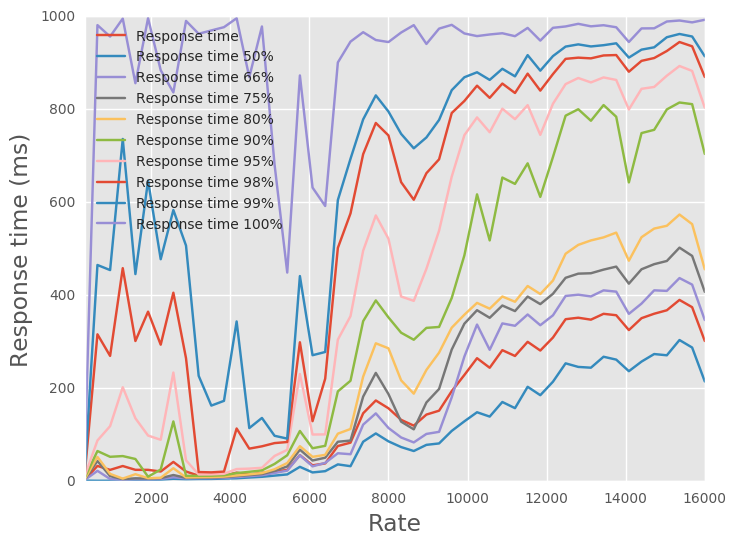

In [25]:
plot_data.plot('Rate', ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                        'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                        'Response time 99%', 'Response time 100%'], ylim=(0, None)).set_ylabel("Response time (ms)")

In [26]:
plot_data['Response time'].describe()

count     50.000000
mean     165.680750
std      138.870660
min        3.606250
25%       24.712500
50%      144.959375
75%      301.378125
max      390.125000
Name: Response time, dtype: float64

In [27]:
plot_data['Response time 95%'].describe()

count     50.000000
mean     457.446250
std      341.050651
min       11.687500
25%       99.000000
50%      476.593750
75%      803.015625
max      893.187500
Name: Response time 95%, dtype: float64

### 3. Success rate

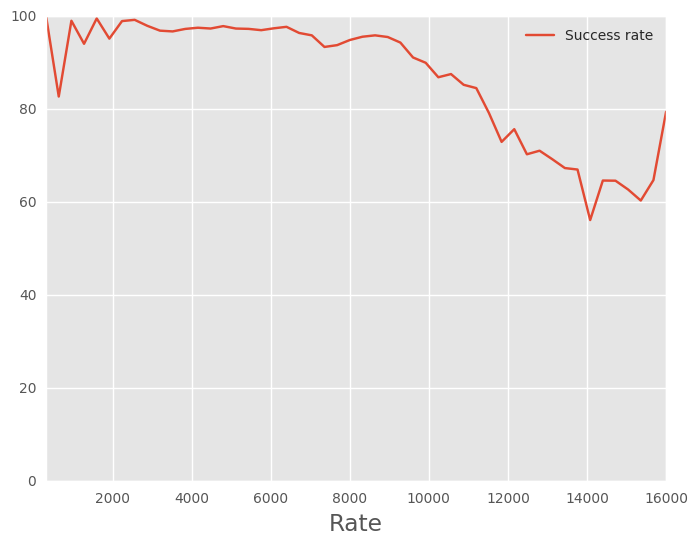

In [28]:
plot_data['Success rate'] = (plot_data['Response status 2xx'] + plot_data['Response status 3xx']) / plot_data['Number of requests'] * 100.0
plot_data.plot('Rate', 'Success rate', ylim=(0, None))

In [29]:
plot_data['Success rate'].describe()

count     50.000000
mean      86.897536
std       13.274716
min       56.188663
25%       76.600224
50%       94.224913
75%       97.300940
max      100.000000
Name: Success rate, dtype: float64

## Server side stats

In [30]:
# read in the stats data
stats_data = pd.read_csv("./results/" + run_name + "/httperf_server_stats.csv", header=0, na_filter=False)
stats_data['Connections Ratio (%)'] = stats_data['Connections'] / sum(stats_data['Connections']) * 100
stats_data['Packets Ratio (%)'] = stats_data['Packets'] / sum(stats_data['Packets']) * 100
stats_data['Bytes Ratio (%)'] = stats_data['Bytes (K)'] / sum(stats_data['Bytes (K)']) * 100
stats_data

,Server,Connections,Packets,Bytes (K),Connections Ratio (%),Packets Ratio (%),Bytes Ratio (%)
0,11.11.11.107:80,14569,471008,31079.746,22.538327,7.295367,7.204596
1,11.11.11.106:80,16552,1991651,133190.000,25.606040,30.848361,30.874776
2,11.11.11.103:80,16652,2005448,134078.000,25.760740,31.062060,31.080623
3,11.11.11.102:80,16868,1988155,133040.000,26.094893,30.794212,30.840004
